# Bank Marketing

**Abstract:**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information**:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier,BaggingRegressor
import time
import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier




In [3]:
#importation de la dataset
dataset = pd.read_csv("bank-additional-full.csv",delimiter=';')


In [4]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
dataset['target']=dataset.y

In [7]:
dataset.y[36440]=='yes'

True

In [8]:
dataset.target[36440]

'yes'

In [9]:
dataset['target']=dataset.target.apply(lambda x:
                                       0 if x=='no'
                                       else 1)

In [10]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
15992,28,admin.,single,high.school,no,no,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0
1956,33,services,married,high.school,no,yes,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
21556,44,unknown,married,unknown,unknown,unknown,unknown,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,0
7023,52,admin.,married,basic.6y,no,yes,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0
9208,43,management,married,university.degree,no,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,0
37030,26,services,single,high.school,no,yes,no,cellular,jul,tue,...,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,no,0
38695,29,housemaid,single,university.degree,no,no,yes,telephone,nov,mon,...,999,0,nonexistent,-3.4,92.649,-30.1,0.715,5017.5,yes,1
20096,33,admin.,single,university.degree,no,yes,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,0
12856,57,admin.,married,basic.4y,unknown,yes,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0


In [11]:
dataset.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

*result of the compaign: 11,2%*

In [12]:
36548/4640

7.876724137931035

In [13]:
# Gestion des NaN 
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
target            False
dtype: bool

In [14]:
nbcol=len(dataset.columns)
nbl=len(dataset)
nbcol

22

In [15]:
dataset.shape

(41188, 22)

In [16]:
dataset['nr.employed'].value_counts(normalize=True)

5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64

# MODEL

In [254]:
col=dataset.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'target'],
      dtype='object')

In [255]:
col=col.drop(['y','target','education'])
col

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [256]:
features_list = col
target_variable = 'target'

In [257]:
X = dataset.loc[:, features_list]
Y = dataset.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')



In [258]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']  at positions  [0, 9, 10, 11, 12, 14, 15, 16, 17, 18]
Found categorical features  ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']  at positions  [1, 2, 3, 4, 5, 6, 7, 8, 13]


In [259]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [260]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[49 'blue-collar' 'married' 'unknown' 'no' 'no' 'cellular' 'nov' 'wed'
  227 4 999 0 'nonexistent' -0.1 93.2 -42.0 4.12 5195.8]
 [37 'entrepreneur' 'married' 'no' 'no' 'no' 'telephone' 'nov' 'wed' 202
  2 999 1 'failure' -0.1 93.2 -42.0 4.12 5195.8]
 [78 'retired' 'married' 'no' 'no' 'no' 'cellular' 'jul' 'mon' 1148 1 999
  0 'nonexistent' -1.7 94.215 -40.3 0.87 4991.6]
 [36 'admin.' 'married' 'no' 'yes' 'no' 'telephone' 'may' 'mon' 120 2 999
  0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [59 'retired' 'divorced' 'no' 'no' 'no' 'cellular' 'jun' 'tue' 368 2 999
  0 'nonexistent' -2.9 92.963 -40.8 1.262 5076.2]]
[[32 'management' 'divorced' 'no' 'no' 'no' 'cellular' 'jul' 'tue' 131 5
  999 0 'nonexistent' 1.4 93.91799999999999 -42.7 4.961 5228.1]
 [37 'unemployed' 'unknown' 'no' 'no' 'no' 'cellular' 'jun' 'tue' 100 1
  999 0 'nonexistent' -2.9 92.963 -40.8 1.262 5076.2]]

[0 0 1 0 0]
[0 0]


In [261]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

if categorical_indices==[]:
    # Normalization
    print("just scaling")
    featureencoder = StandardScaler()
    
elif numeric_indices==[]:
    # OHE / dummyfication
    print("encoding")
    featureencoder = OneHotEncoder(drop='first') 
    
else:

    # Normalization
    numeric_transformer = StandardScaler()

    # OHE / dummyfication
    categorical_transformer = OneHotEncoder(drop='first')
    featureencoder = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_indices),    
            ('num', numeric_transformer, numeric_indices)
            ]    )

X_train = featureencoder.fit_transform(X_train)

print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          1.          1.          0.
   0.86373877 -0.12019627  0.52298128  0.19658384 -0.35012691 -0.11485842
  -0.64896664 -0.32226925  0.28896439  0.3989903 ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          0.
  -0.

In [262]:
    
classifier =XGBClassifier( learning_rate =0.001, n_estimators=1000, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, seed=27,scale_pos_weight=3.5,reg_alpha=10, n_iter_no_change=10)

classifier .fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_iter_no_change=10, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=27,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=3.5, seed=27,
              subsample=0.9, tree_method=None, validate_parameters=False,
              verbosity=None)

In [263]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 1 ... 0 0 0]



In [264]:
print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          1.          0.
  -0.77033007 -0.49089273  0.88631588  0.19658384 -0.35012691  0.83980017
   0.59067482 -0.47351749  0.77344769  0.84491526]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          1.          0.
  -0.

In [265]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 1 ... 1 0 0]



In [266]:
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6376010208421948
f1-score on test set :  0.6507666098807495


CONFUSION MATRIX ON TEST SET


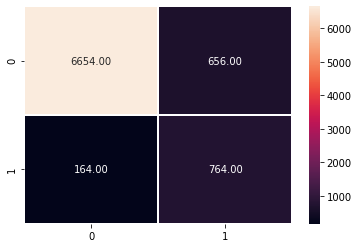

In [267]:
print("CONFUSION MATRIX ON TEST SET")
cm2=confusion_matrix(Y_test,Y_test_pred)
sns.heatmap(cm2, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=1)

In [272]:
(764+656+6654+164)

8238

In [274]:
(8238-1428)/8238

0.8266569555717407

The model has selected 1428 prospects out of 8328 or a 80% saving and had a succes rate of 53%